<center>

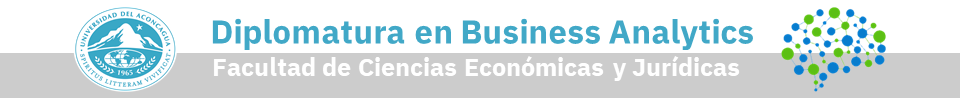

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final Módulo 9

</font>
</center>

González, Analía del Valle


**Instrucciones del Trabajo Final**

- Desarrollar los puntos necesarios para generar los modelos de clasificación.
- Puede usar PyCaret, Scikit-learn o ambos
- Puede generar graficos en cualquier instancia del desarrollo
- Al final del colab, generar una breve conclusión
- Al finalizar, generar PDF del Google Colab para subir en plataforma

En virtud del DataFrame propuesto, generar modelos de clasificación para predecir la contratación de depositos a plazo:

- **age:** edad del cliente, valor numérico entero mayor a 18.
- **job:** trabajo del cliente.
- **marital:** estado civil del cliente.
- **education:** educación alcanzada por el cliente.
- **default:** si el cliente posee deudas.
- **balance:** depósito del cliente en euros.
- **housing:** propietario de inmueble o alquila.
- **loan:** si el cliente tiene un préstamo.
- **contact:** último contacto del cliente.
- **day:** día del último contacto del cliente.
- **month:** mes del último contacto el cliente.
- **duration:** duración del último contacto del cliente.
- **campaign:** identificación de la campaña.
- **pdays:** dias posteriores a la campaña.
- **previous:** números de contactos previos a la campaña.
- **poutcome:** resultados de la campaña anterior.
- **y:** si suscribe un depósito a plazo posterior a campaña.

# **Carga de módulos y datos necesarios**

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install pycaret[silo]

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [4]:
from pycaret.classification import *

# **Creación del DataFrame**

In [5]:
url="https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/"
archivo="bank-full.csv"
clasificacion = pd.read_csv(url+archivo)
clasificacion.replace({"unknown": None}, inplace=True)

In [6]:
clasificacion.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,None,5,may,261,1,-1,0,None,no
1,44,technician,single,secondary,no,29,yes,no,None,5,may,151,1,-1,0,None,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,None,5,may,76,1,-1,0,None,no
3,47,blue-collar,married,None,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no


In [7]:
clasificacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
clasificacion.isnull().sum().sort_values(ascending=False)

poutcome     36959
contact      13020
education     1857
job            288
loan             0
marital          0
default          0
balance          0
housing          0
y                0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
age              0
dtype: int64

# **Generación del primer modelo de clasificación**

In [9]:
clientes_train01 = clasificacion.sample(frac=0.75, random_state=1985)
clientes_test01 = clasificacion.drop(clientes_train01.index)

In [10]:
modelo = setup(data = clientes_train01, target = "y")

,Description,Value
0,session_id,3492
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(33908, 17)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
modelo01=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8787,0.6948,0.4549,0.4791,0.4667,0.3983,0.3984
1,0.8753,0.6960,0.4621,0.4655,0.4638,0.3932,0.3932
2,0.8652,0.6819,0.4424,0.4271,0.4346,0.3581,0.3582
3,0.8707,0.6896,0.4532,0.4484,0.4508,0.3775,0.3775
4,0.8753,0.7094,0.4928,0.4692,0.4807,0.4099,0.4101
5,0.8774,0.6940,0.4549,0.4737,0.4641,0.3949,0.3950
6,0.8626,0.6857,0.4549,0.4186,0.4360,0.3579,0.3583
7,0.8698,0.6929,0.4621,0.4444,0.4531,0.3792,0.3793
8,0.8715,0.7126,0.5054,0.4545,0.4786,0.4056,0.4063
9,0.8727,0.6977,0.4693,0.4561,0.4626,0.3905,0.3905


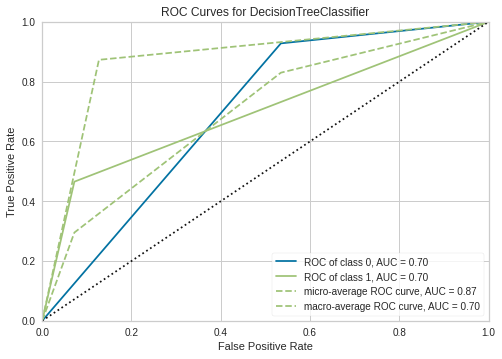

In [12]:
plot_model(modelo01, plot = 'auc')

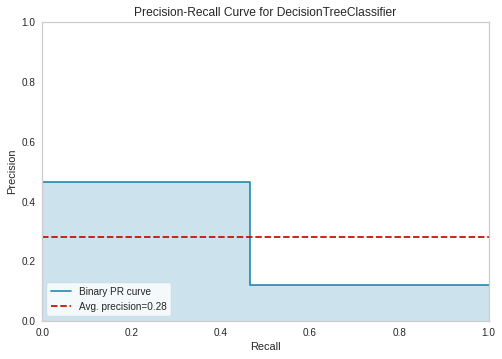

In [13]:
plot_model(modelo01, plot = 'pr')

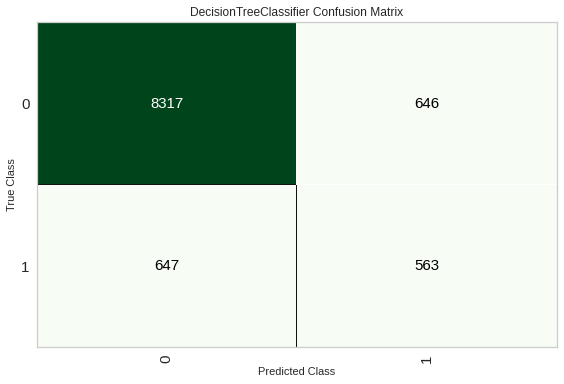

In [14]:
plot_model(modelo01, plot = 'confusion_matrix')

# **Generación del segundo modelo de clasificación**

In [15]:
clasificacion

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,None,5,may,261,1,-1,0,None,no
1,44,technician,single,secondary,no,29,yes,no,None,5,may,151,1,-1,0,None,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,None,5,may,76,1,-1,0,None,no
3,47,blue-collar,married,None,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,None,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,None,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,None,no


In [16]:
clientes_train02 = clasificacion.sample(frac=0.85, random_state=1985)
clientes_test02 = clasificacion.drop(clientes_train02.index)

In [17]:
Modelo_clasif = setup(data = clientes_train02, target = "y", session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(38429, 17)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
modelo02=create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8848,0.7322,0.5338,0.5015,0.5171,0.4518,0.4521
1,0.8777,0.7003,0.4695,0.4710,0.4702,0.4011,0.4011
2,0.8770,0.6909,0.4487,0.4682,0.4583,0.3889,0.3890
3,0.8799,0.7316,0.5385,0.4841,0.5099,0.4417,0.4425
4,0.8788,0.7129,0.4968,0.4784,0.4874,0.4187,0.4188
5,0.8881,0.7042,0.4647,0.5197,0.4907,0.4281,0.4289
6,0.8822,0.7134,0.4936,0.4920,0.4928,0.4261,0.4261
7,0.8762,0.7197,0.5160,0.4694,0.4916,0.4213,0.4219
8,0.8792,0.7200,0.5128,0.4805,0.4961,0.4276,0.4279
9,0.8907,0.7238,0.5064,0.5302,0.5180,0.4564,0.4566


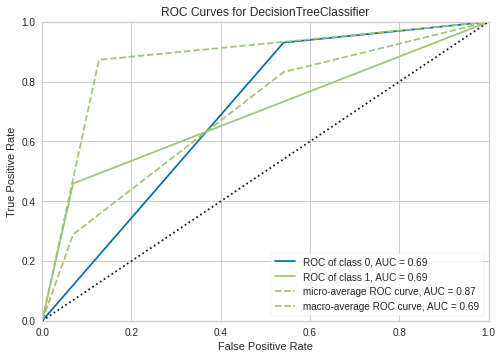

In [19]:
plot_model(modelo02, plot = 'auc')

Varía la curva ROC por el aumento de la proporción de falsos (+), con respecto al aumento de los verdaderos (+)

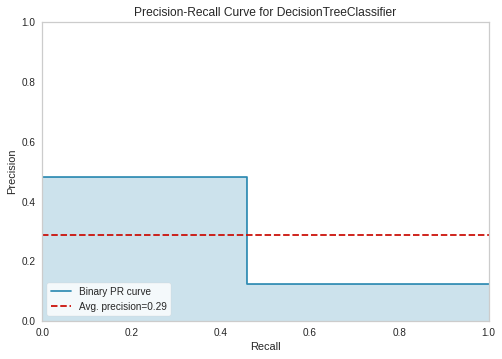

In [20]:
plot_model(modelo02, plot = 'pr')

Este gráfico muestra que la curva está lejos de la esquina superior derecha, por lo tanto muestra una precisión baja y una exhaustividad baja. La precisión promedio es baja.

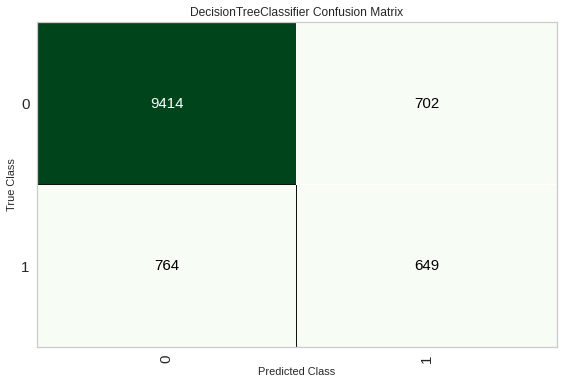

In [21]:
plot_model(modelo02, plot = 'confusion_matrix')

Esta matriz muestra los aciertos (9414,649) y errores del modelo (764,702).

# **Conclusiones**

Al incluir una mayor cantidad de datos al conjunto de entrenamiento, el algoritmo va a considerar esa mayor cantidad para aprender y poder predecir con mayor presición, teniendo en cuenta que el conjunto de datos que se está utilizando es pequeño. Por lo tanto las métricas que arroja el segundo árbol de decisión serán mayores, pero el cambio es pequeño. 
 #El Accuracy es una de las métricas más utilizadas, aún así, no es la más recomendable, ya que no tiene en cuenta los falsos positivos ni falsos negativos, por lo cual puede mostrar que un modelo malo (como el de este tp) parezca mejor de lo que realmente es, en el ejemplo del segundo modelo aumentó a 0.8814, lo cual significa que el modelo acierta en las predicciones un 88%, es decir, de todos los clientes que el modelo predijo que constituirían un plazo fijo, lo constituyeron efectivamente un 88%. Sin embargo, si se compara con otra métrica como la presición, se observa que este valor es mucho más bajo, en el segundo modelo es 0.4895, lo que quiere decir que el modelo sólo acertará en las predicciones un 49% aprox, es decir, que de todos los clientes que el modelo predijo que constituirían un plazo fijo, sólo lo constituyeron un 49% (esto muestra una gran cantidad de falsos positivos, esto significa que el modelo se equivocará un 51% de las veces cuando prediga que un cliente va a constituir un plazo fijo).  